In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
from matplotlib.animation import FuncAnimation

# if you run this from your computer set
# this variable to False for speedier videos
remote = True
if remote:
    %matplotlib inline
    from matplotlib import rc
    rc('animation', html='html5')
else:
    %matplotlib

In [2]:
def to_spherical(ϕ, θ, l=1):
    return [l*np.sin(θ)*np.cos(ϕ),
            l*np.sin(θ)*np.sin(ϕ),
            -l*np.cos(θ)]

In [3]:
class system():
    def __init__(self, I, m=1, l=1, g=9.8):
        self.C = I / (m * l**2)
        
    def diff(self, t, y):
        (ϕ, θ, dϕ, dθ) = y
        tmp = np.cos(θ)/np.sin(θ)**3
        return [dϕ, dθ,
                -2*self.C*dθ*tmp, self.C**2 * tmp - g/l * np.sin(θ)]

In [4]:
t_span = (0, 20)
t_eval = np.arange(*t_span,0.05)

In [5]:
m = l = 1
g = 9.8

# θ in (0, pi), ϕ in (-pi, pi)
y0 = ϕ0, θ0, dϕ0, dθ0 = 0, 1.2, 0.5, 0.2

I = m * l**2 * dϕ0 * np.sin(θ0)**2

pendulum = system(I, m, l, g)

def E(y0):
    ϕ0, θ0, dϕ0, dθ0 = y0
    return dθ0**2/2 + pendulum.C**2 / (2* np.sin(np.pi-θ0)**2) + g/l * np.cos(np.pi-θ0)

print("I = {:.5}\nE = {:.5}".format(I, E(y0)))

I = 0.43435
E = -3.4225


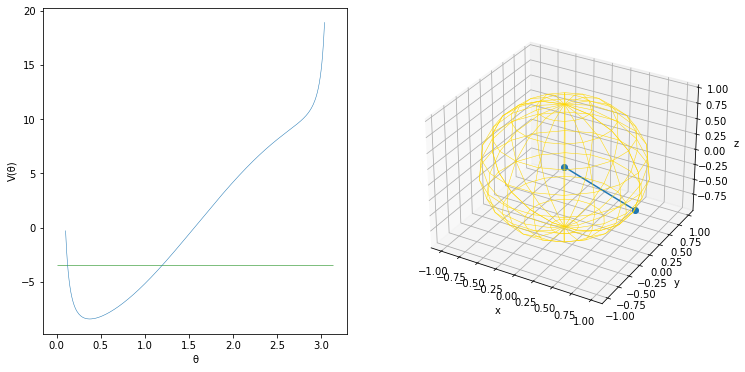

In [6]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
θ = np.arange(0.1,np.pi-0.1, 0.01)
ax.plot(θ, pendulum.C**2 / (2 * np.sin(np.pi-θ)**2) + g/l * np.cos(np.pi-θ), linewidth=0.5)
ax.hlines(E(y0),0,np.pi, color="g", linewidth=0.5)
ax.set_xlabel("θ")
ax.set_ylabel("V(θ)")

ax = fig.add_subplot(122,projection='3d')
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x, y, z = l*np.sin(u)*np.cos(v), l*np.sin(u)* np.sin(v), l*np.cos(u)
ax.plot_wireframe(x, y, z, color="gold", linewidth=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
x0p, y0p, z0p = to_spherical(ϕ0, θ0, l)
ax.plot([0, x0p], [0, y0p], [0, z0p], "o-")
plt.show()

In [7]:
sol = si.solve_ivp(pendulum.diff, t_span, y0,
                   t_eval=t_eval, method="LSODA")

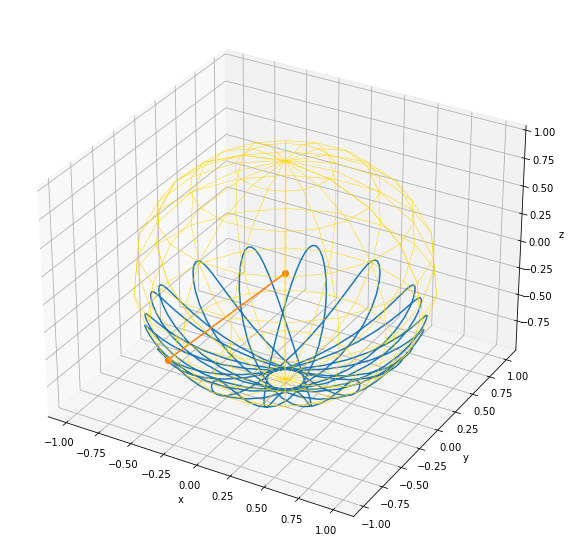

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

xdata, ydata, zdata = to_spherical(sol.y[0], sol.y[1], l)
traj_plot, = ax.plot([], [], [])
pendulum_plot, = ax.plot([], [], [], "o-")

def init():
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x, y, z = l*np.sin(u)*np.cos(v), l*np.sin(u)* np.sin(v), l*np.cos(u)
    ax.plot_wireframe(x, y, z, color="gold", linewidth=0.5)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    
    x0, y0, z0 = to_spherical(θ0, ϕ0, l)
    pendulum_plot.set_data_3d([0, x0], [0, y0], [0, z0])
    
    return traj_plot, pendulum_plot

def update(frame):
    traj_plot.set_data_3d(xdata[:frame], ydata[:frame], zdata[:frame])
    pendulum_plot.set_data_3d([0, xdata[frame]], [0, ydata[frame]], [0, zdata[frame]])
    return traj_plot, pendulum_plot

ani = FuncAnimation(fig, update, len(sol.t), init_func=init, blit=False)
# if remote=True in the first cell, this may take a while since
# it will first render a video and then load it in the notebook
ani